# Split one COCO annotation JSON file into training and validation JSON files.

Given a single COCO annotated JSON file, your goal is to split them into training and validation COCO annotated JSON files.

 A single JSON file needs to be split into training and validation files. The output files will be further converted to TFRecord files using another notebook.

This notebook uses a third party library to accomplish this task. The library can split the JSON files according to the ratio. We kept the validation file to contain 20% of the data. 

This notebook is an end to end example. When you run the notebook, it will take one JSON file and will split into a train and a val JSON file.

**Note** - In this example, we assume that all our data is saved on Google drive and we will also write our outputs to Google drive. We also assume that the script will be used as a Google Colab notebook. But this can be changed according to the needs of users. They can modify this in case they are working on their local workstation, remote server or any other database. This colab notebook can be changed to a regular jupyter notebook running on a local machine according to the need of the users.

## **MUST DO** - Install and restart runtime

In [ ]:
# install python object detection insights library to merge multiple COCO annotation files
!pip install pyodi

# RESTART THE RUNTIME in order to use this library

## Run the below command to connect to your google drive

In [ ]:
# import other libraries
from google.colab import drive
import pyodi
import sys
from configparser import ConfigParser

In [ ]:
# connect to google drive
drive.mount('/content/gdrive')

# making an alias for the root path
try:
  !ln -s /content/gdrive/My\ Drive/ /mydrive
  print('Successful')
except Exception as e:
  print(e)
  print('Not successful')

Mounted at /content/gdrive
Successful


## Clone TensorFlow Model Garden repository

In [ ]:
# move to the specified folder where you want to clone
%cd $tensorflow_model_folder

In [ ]:
# clone the Model Garden directory for Tensorflow where all the config files and scripts are located for this project. 
# project folder name is - 'waste_identification_ml'
!git clone https://github.com/tensorflow/models.git 

In [ ]:
# Go to the model folder
%cd models

## **MUST CHANGE** - Import the path and parameters

In [ ]:
config = ConfigParser()

# path to the config file defining parameters
# config.ini file is an important file where all the parameter variables are located.
# config.ini file resides in the 'config' folder which is in the 'pre_processing' folder
config.read('official/projects/waste_identification_ml/pre_processing/config/config.ini')

# folder where all python scripts and configuration file are located
config_folder_path = config['config']['config_folder_path']

# path of the input file to split
input_file = config['split']['input_file']

# path to store the split files ( train and val )
output_folder = config['split']['output_folder']

In [ ]:
# insert 'config' folder path for importing the file
sys.path.insert(0, config_folder_path)

# import visualization script
from visualization import visualize_annotation_file

## Split coco annotation file into train and val COCO files

In [ ]:
# split a COCO annotation file into train and val files
!pyodi coco random-split $input_file $output_folder --val-percentage 0.2

# there will be two files with name '_train.json' and '_val.json' in the output_folder

2022-04-21 22:03:27.150 | INFO     | pyodi.apps.coco.coco_split:random_split:183 - Gathering images...
2022-04-21 22:03:27.171 | INFO     | pyodi.apps.coco.coco_split:random_split:194 - Gathering annotations...
2022-04-21 22:03:29.601 | INFO     | pyodi.apps.coco.coco_split:random_split:218 - Saving splits to file...
/mydrive/gtech/MRFs/Recykal/Latest_sharing_by_sanket/Google_Recykal/Taxonomy_version_2/_train.json
/mydrive/gtech/MRFs/Recykal/Latest_sharing_by_sanket/Google_Recykal/Taxonomy_version_2/_val.json


## Visualization

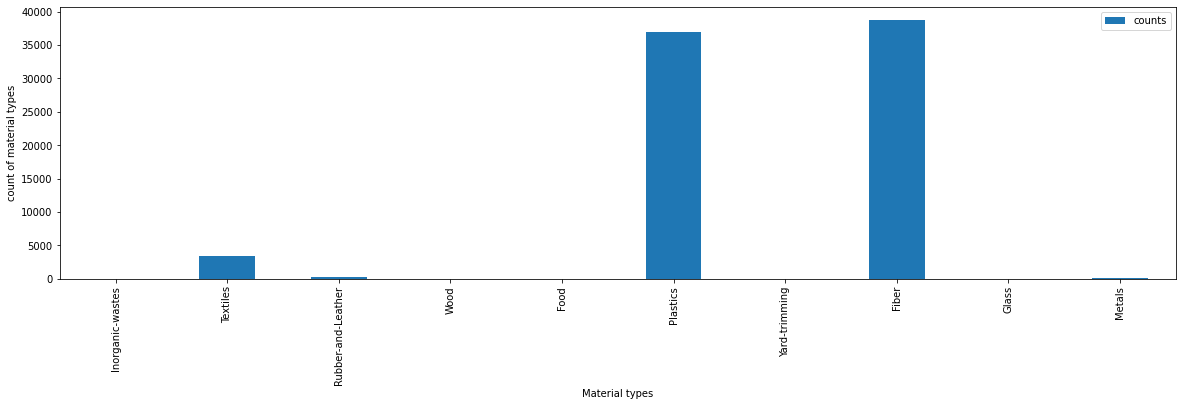

In [ ]:
# visualization of the input COCO annotated JSON file
visualize_annotation_file(input_file)

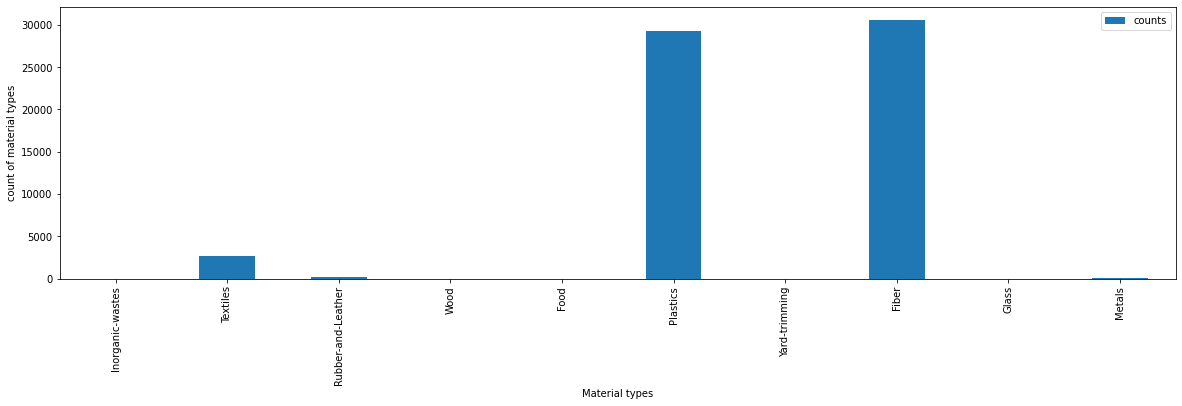

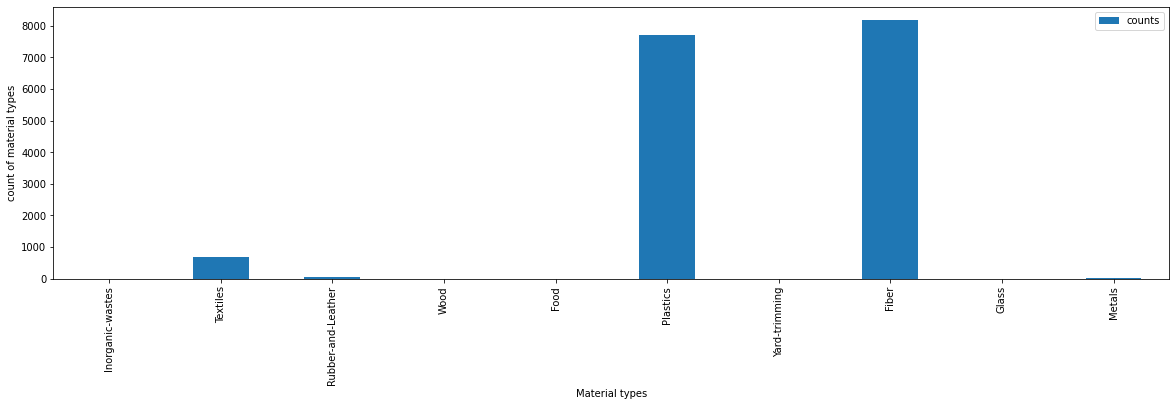

In [ ]:
# visualization of the training COCO annotated JSON file
visualize_annotation_file(output_folder + '_train.json')

# visualization of the validation COCO annotated JSON file
visualize_annotation_file(output_folder + '_val.json')